In [5]:
import h5py
data = h5py.File('E:\PycharmProjects\AI\data_test_15.mat','r')
data = data['data15'][:] 
data.shape

(440001, 16)

In [6]:
import pandas as pd
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.00,9.851395,0.732205,0.813153,99.939730,100.131053,-7.279717,4.435547,0.060353,-0.634066,0.602393,-0.932980,0.966279,0.295628,0.0,12156.134938
1,0.01,9.726729,1.109430,0.932475,99.813302,99.667727,4781.232030,467085.836881,-0.348846,0.787168,-0.670476,-0.750454,-0.542649,-0.480694,0.0,12125.398424
2,0.02,10.373145,0.934842,0.987616,98.554727,98.749230,7686.605940,743102.766912,0.726556,-0.072662,-0.356573,-0.120964,-0.041896,-0.073595,0.0,11821.540886
3,0.03,9.496506,1.035372,1.285004,97.807199,97.680158,9313.306206,890920.774183,-0.063252,0.335309,0.245567,0.371460,-0.552622,-0.469130,0.0,11642.890698
4,0.04,10.383242,1.027973,1.080452,96.273048,96.261151,10223.088180,965515.731131,-0.153638,0.334758,0.329005,0.130848,0.179964,0.426070,0.0,11280.506866


In [7]:
data.columns=(['time','vhub','wrm1','wrm2','wgm1','wgm2','taogm','pgm','beta1m1','beta1m2','beta2m1',
                      'beta2m2','beta3m1','beta3m2','betar','taogr'])
data.head()

,time,vhub,wrm1,wrm2,wgm1,wgm2,taogm,pgm,beta1m1,beta1m2,beta2m1,beta2m2,beta3m1,beta3m2,betar,taogr
0,0.00,9.851395,0.732205,0.813153,99.939730,100.131053,-7.279717,4.435547,0.060353,-0.634066,0.602393,-0.932980,0.966279,0.295628,0.0,12156.134938
1,0.01,9.726729,1.109430,0.932475,99.813302,99.667727,4781.232030,467085.836881,-0.348846,0.787168,-0.670476,-0.750454,-0.542649,-0.480694,0.0,12125.398424
2,0.02,10.373145,0.934842,0.987616,98.554727,98.749230,7686.605940,743102.766912,0.726556,-0.072662,-0.356573,-0.120964,-0.041896,-0.073595,0.0,11821.540886
3,0.03,9.496506,1.035372,1.285004,97.807199,97.680158,9313.306206,890920.774183,-0.063252,0.335309,0.245567,0.371460,-0.552622,-0.469130,0.0,11642.890698
4,0.04,10.383242,1.027973,1.080452,96.273048,96.261151,10223.088180,965515.731131,-0.153638,0.334758,0.329005,0.130848,0.179964,0.426070,0.0,11280.506866


In [8]:
from scipy import signal 
Fs = 100
wp = 5/(Fs/2)
ws = 10/(Fs/2)
rp = 2
rs = 40
N, Wn = signal.buttord(wp, ws, rp, rs)
b, a = signal.butter(N, Wn,'lowpass')
for i in range(1,16):
    data.iloc[:,i] = signal.filtfilt(b,a,data.iloc[:,i])
process = data.iloc[:,1:16]
process.head()

,vhub,wrm1,wrm2,wgm1,wgm2,taogm,pgm,beta1m1,beta1m2,beta2m1,beta2m2,beta3m1,beta3m2,betar,taogr
0,9.844897,0.732492,0.818638,100.135733,100.328960,34.376136,6006.861567,0.074918,-0.629608,0.601943,-0.931906,0.963834,0.287070,-6.457438e-321,12201.356131
1,9.794377,0.811158,0.862955,98.657534,98.806010,2095.555627,192633.730815,0.091679,-0.484623,0.501372,-0.757497,0.742723,0.219825,-6.151117e-321,11855.771995
2,9.748793,0.885978,0.905189,97.196698,97.302236,4075.856787,371531.491458,0.104394,-0.343499,0.404540,-0.589412,0.530761,0.156288,-5.691636e-321,11514.342667
3,9.710381,0.953595,0.943846,95.797782,95.863566,5904.499674,536238.862679,0.111442,-0.210371,0.314112,-0.434442,0.336229,0.099084,-5.133342e-321,11187.507653
4,9.680821,1.011216,0.977714,94.506024,94.536362,7521.960725,681401.425317,0.111780,-0.089017,0.232248,-0.298497,0.166081,0.050323,-4.545404e-321,10885.847885


In [9]:
process.to_csv('E:\PycharmProjects\AI\process.csv')

In [1]:
import pandas as pd 
process = pd.read_csv('E:\PycharmProjects\AI\process.csv')
for i in range(44000):
    t =i*10
    process.iloc[i,:] = process.iloc[t,:]
sensor = process.iloc[26000:44000,1:16]
sensor

,vhub,wrm1,wrm2,wgm1,wgm2,taogm,pgm,beta1m1,beta1m2,beta2m1,beta2m2,beta3m1,beta3m2,betar,taogr
26000,14.812294,1.792146,1.658011,161.284365,161.260291,30348.206260,4.798070e+06,-1.885337,-2.143570,-2.113014,-2.159473,-1.723717,-1.838242,-2.001819,30368.542830
26001,14.704425,1.686974,1.715257,161.459403,161.657358,30360.871393,4.806645e+06,-2.019574,-1.991669,-1.970230,-1.942506,-2.067514,-2.036762,-1.999223,30335.679629
26002,15.093748,1.658837,1.714827,161.636845,161.465337,30292.167956,4.794825e+06,-1.955442,-2.000782,-1.811087,-2.021805,-2.000294,-2.066535,-2.000151,30302.267917
26003,14.727081,1.652320,1.763333,161.440012,161.574121,30343.974121,4.804183e+06,-1.747236,-2.108809,-2.020934,-2.192736,-2.104304,-2.083818,-2.000207,30339.257183
26004,14.954754,1.666497,1.709284,161.643075,161.701425,30301.828200,4.803038e+06,-2.177709,-2.292584,-1.893896,-1.944674,-1.835587,-1.807877,-2.000015,30301.154973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,19.843005,1.712576,1.795924,162.356515,162.431961,32164.366350,5.119605e+06,11.895700,12.237088,11.902882,12.309474,11.946065,12.194499,12.034096,30167.958714
43996,19.436167,1.757183,1.719523,162.318776,162.407467,32167.587075,5.118274e+06,12.162141,11.931185,12.214157,12.107037,11.949702,12.056955,11.919899,30174.996561
43997,19.522234,1.683685,1.758340,162.046103,162.203427,32218.673098,5.121776e+06,11.651239,12.025805,11.951448,12.108189,12.195853,11.795436,10.846741,30225.748025
43998,18.564883,1.593721,1.644373,162.252594,162.143006,32196.323582,5.116993e+06,10.883058,11.544301,11.343725,11.158639,11.339160,11.356866,11.685414,30187.279233


In [2]:
x_train = sensor.iloc[0:2000,:]
x_test = sensor.iloc[1985:18000,:]
print(x_train.shape,x_test.shape)

(2000, 15) (16015, 15)


In [3]:
import numpy as np
mu = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
train = (x_train-mu)/std
test = (x_test-mu)/std
train

,vhub,wrm1,wrm2,wgm1,wgm2,taogm,pgm,beta1m1,beta1m2,beta2m1,beta2m2,beta3m1,beta3m2,betar,taogr
26000,-2.272445,1.737951,-1.033668,-1.687827,-1.764079,1.460217,-0.829951,-3.841959,-3.908790,-3.900553,-3.910613,-3.784356,-3.825721,-3.877846,1.695615
26001,-2.320868,-0.335544,0.121191,-1.303618,-0.882351,1.609832,2.781286,-3.880278,-3.865484,-3.859856,-3.848794,-3.882269,-3.882383,-3.877105,1.308326
26002,-2.146098,-0.890262,0.112524,-0.914131,-1.308753,0.798230,-2.196395,-3.861971,-3.868082,-3.814496,-3.871388,-3.863125,-3.890881,-3.877370,0.914573
26003,-2.310697,-1.018745,1.091065,-1.346181,-1.067186,1.410222,1.744269,-3.802536,-3.898880,-3.874308,-3.920090,-3.892747,-3.895814,-3.877386,1.350487
26004,-2.208493,-0.739252,0.000689,-0.900456,-0.784496,0.912348,1.262234,-3.925420,-3.951273,-3.838099,-3.849412,-3.816216,-3.817055,-3.877331,0.901458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-0.339706,1.221691,0.150965,0.817463,0.463029,-0.654151,-0.604468,-0.179832,-0.108604,-0.180352,-0.179233,-0.188298,-0.129171,0.184097,-0.819904
27996,-0.002784,1.249872,-0.806077,0.316926,0.245319,-0.511603,-0.406608,0.017933,0.023645,-0.008067,-0.096941,-0.005614,0.001168,-0.065952,-0.319825
27997,-0.111566,-0.541088,-0.204293,0.467983,0.477413,-0.329681,1.024850,0.073280,-0.007215,0.040606,0.011475,0.009392,0.044997,0.017507,-0.470949
27998,-0.149299,1.815690,0.046343,0.635988,0.593301,-0.727517,-1.006566,-0.049999,0.063797,0.046649,0.053613,0.001286,0.027843,0.114941,-0.638475


In [25]:
xtrain =[]
ytrain =[]
xtest  =[]
ytest =[]
for i in range(15, len(train)):
    xtrain.append(train.iloc[i - 15:i, :].values)
    ytrain.append(train.iloc[i, 7])
for j in range(15, len(test)):
    xtest.append(test.iloc[j - 15:j, :].values)
    ytest.append(test.iloc[j, 7])

In [26]:
xtest[0].shape

(15, 15)

In [27]:
import tensorflow as tf
np.random.seed(7)
np.random.shuffle(xtrain)
np.random.seed(7)
np.random.shuffle(ytrain)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtest, ytest = np.array(xtest), np.array(ytest)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
xtrain = np.reshape(xtrain, (xtrain.shape[0], 15, 15))
xtest = np.reshape(xtest, (xtest.shape[0], 15, 15))

In [28]:
print(xtrain.shape,xtest.shape)

(1985, 15, 15) (16000, 15, 15)


In [29]:
from tensorflow.keras.layers import LSTM, Dense
model = tf.keras.Sequential([
    LSTM(200),
    Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
              loss='mean_squared_error')  # 损失函数用均方误差


history = model.fit(xtrain, ytrain, batch_size=32, epochs=50, validation_data=(xtest, ytest), validation_freq=1)

model.summary()

Epoch 1/50
63/63 [==============================] - 4s 57ms/step - loss: 0.0487 - val_loss: 0.9872
Epoch 2/50
63/63 [==============================] - 3s 53ms/step - loss: 0.0031 - val_loss: 0.9373
Epoch 3/50
63/63 [==============================] - 4s 57ms/step - loss: 0.0026 - val_loss: 0.9117
Epoch 4/50
63/63 [==============================] - 3s 55ms/step - loss: 0.0027 - val_loss: 0.9010
Epoch 5/50
63/63 [==============================] - 4s 56ms/step - loss: 0.0028 - val_loss: 0.8964
Epoch 6/50
63/63 [==============================] - 3s 53ms/step - loss: 0.0028 - val_loss: 0.9028
Epoch 7/50
63/63 [==============================] - 3s 53ms/step - loss: 0.0034 - val_loss: 0.9080
Epoch 8/50
63/63 [==============================] - 3s 53ms/step - loss: 0.0025 - val_loss: 0.8857
Epoch 9/50
63/63 [==============================] - 3s 54ms/step - loss: 0.0023 - val_loss: 0.8898
Epoch 10/50
63/63 [==============================] - 3s 54ms/step - loss: 0.0031 - val_loss: 0.9096
Epoch 11/

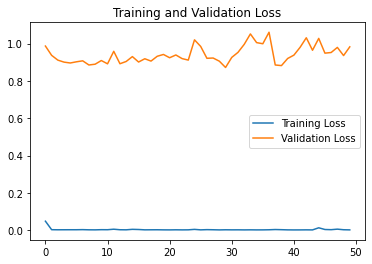

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
import matplotlib.pyplot as plt
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [31]:
predicted_value = model.predict(xtest)
predicted = np.reshape(predicted_value,(predicted_value.shape[0],))
predicted.shape

(16000,)

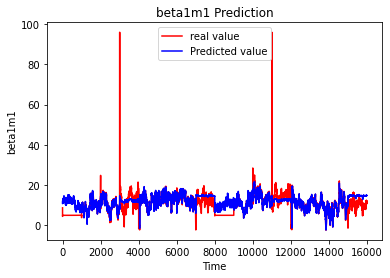

In [32]:
predicted1 =predicted*std[7]+mu[7]
real = ytest*std[7]+mu[7]
# 画出真实数据和预测数据的对比曲线
plt.figure()
plt.plot(real, color='red', label='real value')
plt.plot(predicted1, color='blue', label='Predicted value')
plt.title('beta1m1 Prediction')
plt.xlabel('Time')
plt.ylabel('beta1m1')
plt.legend()
plt.show()

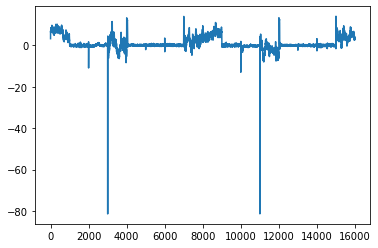

In [33]:
re = predicted1-real
plt.plot(re)
plt.show()

In [34]:
cc_b1m1 = pd.DataFrame(re,columns =['cc_b1m1'])
cc_b1m1.to_csv('E:\PycharmProjects\AI\cc_b1m1.csv')
cc_b1m1

,cc_b1m1
0,3.188340
1,6.947912
2,5.553427
3,6.416606
4,6.272015
...,...
15995,2.911097
15996,2.673668
15997,3.196354
15998,3.869191
